# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Data Files

In [13]:
import glob

# Find all text files starting with "out"
fileList = glob.glob("out*.txt") 

# Organize the data into arrays
dataArr = []
for file in fileList:
    _, tnum, pbc, N, gam = file.split("-")
    tnum, pbc, N, gam = int(tnum), int(pbc), int(N), float(gam[:-4])

    data = np.loadtxt(file)

    dataArr += [(tnum, pbc, N, gam, data.T)]


# Get time data
with open("time.txt", "r") as file:
    text = file.read().split("\n")
    text = [item for item in text if len(item) > 2]

tt, rr, uu = [], [], []
for index in range(len(text) // 4):
    index *= 4
    tt += [int(text[index].split("=")[-1])]
    rr += [float(text[index + 1].split("m")[-1][:-1])]
    uu += [float(text[index + 2].split("m")[-1][:-1])]

rr = np.array(rr)

# Problem 1

In [14]:
def plotOne(pbc: int, N: int, gam: float, data: np.ndarray) -> None:
    
    plt.title(f"Density of States for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
    plt.plot(data[0, :], data[1, :], label="Calculated DOS")
    plt.plot(data[0, :], data[2, :], label="Thermodynamic DOS")
    plt.xlabel("$\\varepsilon / t$")
    plt.ylabel("$\\rho(\\varepsilon) \\times t$")
    plt.legend()
    plt.show()

    print("Analysis for the plot above:")
    print(f"Maximum difference is {np.max(np.abs(data[1, :] - data[2, :]))}")
    print(f"Average difference is {np.mean(data[1, :] - data[2, :])}")
    print(f"Std of difference is {np.std(data[1, :] - data[2, :])}")
    print("\n\n")


def plotAll(dataArr: list, cols: int) -> None:
    # Needed number of columns
    rows = len(dataArr) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        tnum, pbc, N, gam, data = item

        # Plotting
        plt.subplot(rows, cols, index+1)
        plt.title(f"Density of States for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
        plt.plot(data[0, :], data[1, :], label="Calculated DOS")
        plt.plot(data[0, :], data[2, :], label="Thermodynamic DOS")
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$\\rho(\\varepsilon) \\times t$")
        plt.legend()

        # Analysis
        print(f"Analysis for N = {N}, gamma = {gam} and {'p.' if pbc else 'o.'}b.c.")
        print(f"Maximum difference is {np.max(np.abs(data[1, :] - data[2, :]))}")
        print(f"Average difference is {np.mean(data[1, :] - data[2, :])}")
        print(f"Std of difference is {np.std(data[1, :] - data[2, :])}")
        print("\n\n")    

    plt.subplots_adjust(hspace=0.35)
    plt.show()

Analysis for N = 128, gamma = 0.01 and p.b.c.
Maximum difference is 2.38434
Average difference is -0.005569412689116642
Std of difference is 0.16690200479420064



Analysis for N = 64, gamma = 0.01 and p.b.c.
Maximum difference is 2.40521
Average difference is -0.005530313714006832
Std of difference is 0.26952107992848917



Analysis for N = 64, gamma = 0.01 and o.b.c.
Maximum difference is 2.604765
Average difference is -0.0039026897022938012
Std of difference is 0.17223835488168784



Analysis for N = 128, gamma = 0.01 and o.b.c.
Maximum difference is 2.49375
Average difference is -0.004735934309419229
Std of difference is 0.11617181578782464



Analysis for N = 4096, gamma = 0.01 and o.b.c.
Maximum difference is 2.3869499999999997
Average difference is -0.005543218643240604
Std of difference is 0.09783628513852718



Analysis for N = 8192, gamma = 0.01 and o.b.c.
Maximum difference is 2.38523
Average difference is -0.005556270863836016
Std of difference is 0.09777165815308765



Ana

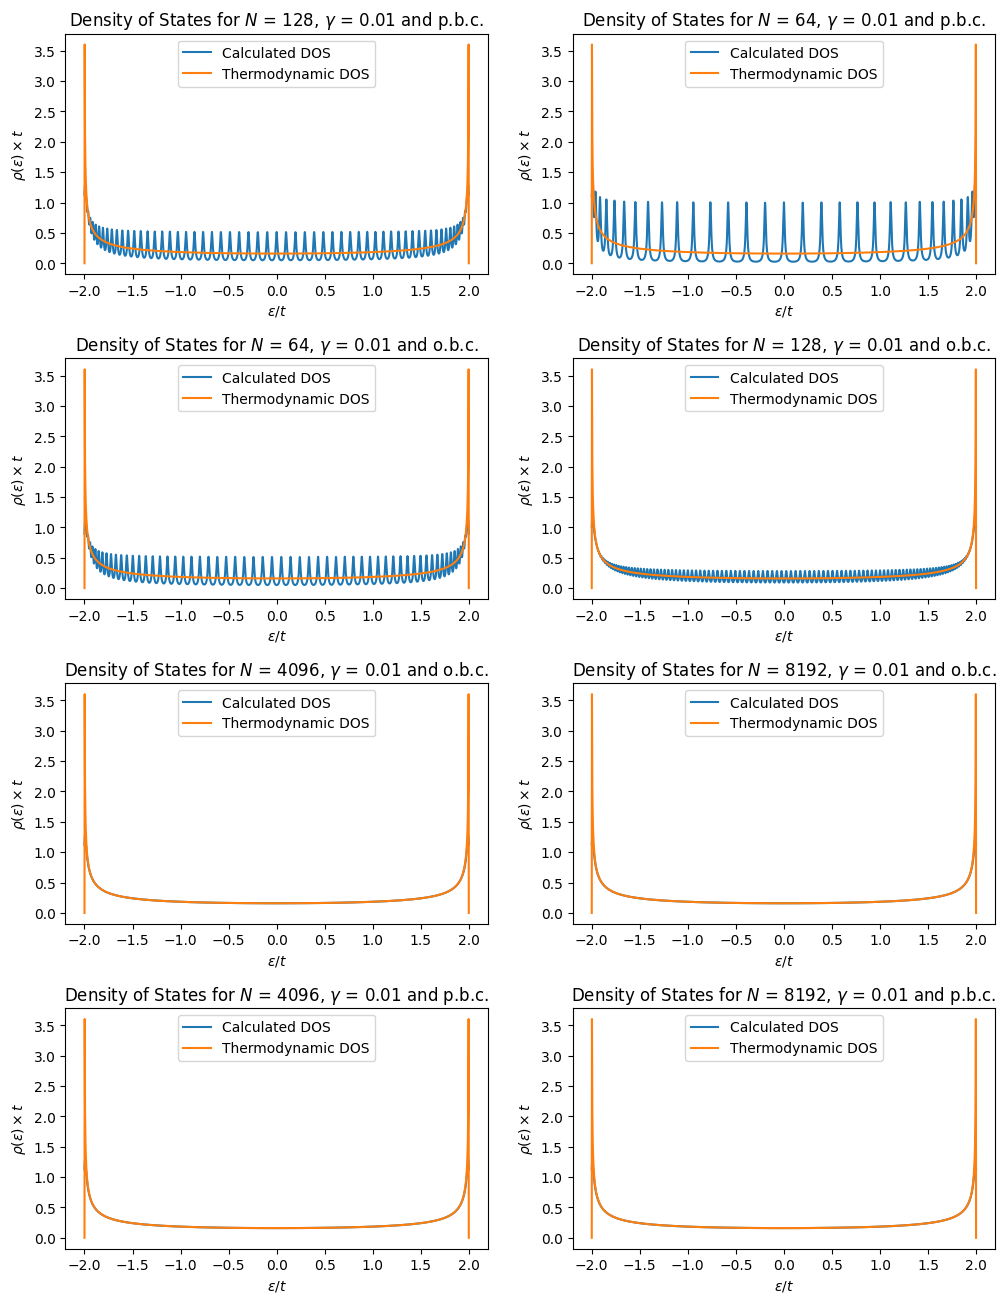

In [15]:
plotAll(dataArr, 2)

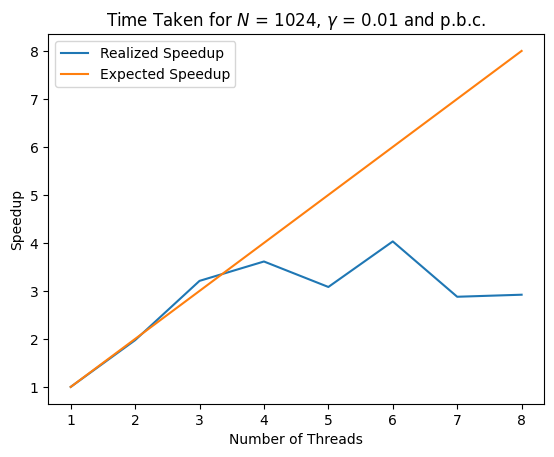

In [16]:
plt.title(f"Time Taken for $N$ = {1024}, $\\gamma$ = {0.01} and {'p.' if True else 'o.'}b.c.")
plt.plot(tt, rr[0] / rr, label="Realized Speedup")
plt.plot(tt, tt, label="Expected Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend()